# **Exploring cell types across species using atlasapprox**

Understanding where a cell type exists, its marker genes, and its relationships with other cell types is fundamental to single-cell analysis. The [Atlasapprox API](https://atlasapprox.readthedocs.io/en/latest/python/index.html) provides access to cell atlas data across 31 species, including humans, mice, fish, plants, and worms.

This tutorial will guide you through querying cell type data for any species, using human examples where needed. You’ll learn to:

- Find where a cell type is located across different organs.
- Retrieve all cell types present in a specific organ.
- Generate a cell type × organ presence matrix.
- Identify marker genes for a specific cell type.
- Find cell types most similar to a given one.
- Visualize results using tables and heatmaps.

## **Before you begin**

Before diving into this tutorial, make sure you have atlasapprox installed and properly set up. If you haven’t done so, please check the Quick Start Guide for installation instructions and API initialization.

Additionally, install the required packages if you haven't already:

In [1]:
pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


For complete setup instructions, see the [Quick Start Tutorial](https://github.com/Amber-Xu914/atlasapprox_api_tutorials/blob/main/python/quick_start.ipynb).

## **Setting up the API**

First, install and import the required packages.

In [ ]:
import atlasapprox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the API
api = atlasapprox.API()

## **Querying the location of a single cell type**

Cellular diversity is also an important prerequisite for species diversity. Cellular diversity provides the physiological and genetic foundation for species to thrive in various environments. If you are interested in a particular type of cell and want to obtain information about it, you can get some assistance through *atlasapprox* api. A simple way to get started is to use the `celltype_location` method.

Try the following code to retrieve a list of organs where T cells are present in humans:

In [ ]:
T_cell_location = api.celltype_location(
        organism='h_sapiens', 
        cell_type='T', 
        measurement_type='gene_expression'
        )

T_cell_location

['bladder',
 'blood',
 'colon',
 'eye',
 'fat',
 'gut',
 'kidney',
 'liver',
 'lung',
 'lymphnode',
 'mammary',
 'marrow',
 'muscle',
 'pancreas',
 'prostate',
 'salivary',
 'skin',
 'spleen',
 'thymus',
 'tongue',
 'trachea',
 'uterus']

#### Output
This method returns a list of organs where T cells are found.

Marker genes are cell-specific and provide valuable functional information. Therefore, studying marker genes is an excellent way to understand a specific cell type. For example, exploring T cell marker genes is a great starting point to get familiar with T cells in a particular organ. The following section demonstrates how to obtain T cell marker genes expression data in human lungs.

## **Querying expression data for marker genes in a specific organ**

The example below illustrates how to obtain marker genes for a specific organ and cell type of interest and query their average expression.

You can begin by using the `markers` method to get the top 10 marker genes for T cell in the human lung:

In [63]:
markers_in_human_lung_T = api.markers(
    organism='h_sapiens', 
    organ='lung', 
    cell_type='T', 
    number=10
)

markers_in_human_lung_T

['CD3E',
 'CD3D',
 'CD3G',
 'TRAC',
 'CD2',
 'GPR171',
 'TRAT1',
 'BCL11B',
 'TRBC2',
 'THEMIS']

#### Output

This method returns a list of marker genes based on the desired quantity.

Next, use the `average` method to retrieve the average marker genes expression across all the cell types:

In [ ]:
human_blad_markers_expr = api.average(
    organism='h_sapiens',
    organ='bladder',
    features=markers_in_human_lung_T
)

human_blad_markers_expr

,mast,macrophage,B,plasma,T,NK,plasmacytoid,urothelial,venous,capillary,lymphatic,fibroblast,smooth muscle,pericyte
CD3E,0.125592,0.193873,0.191272,0.300453,4.764482,3.695696,0.101148,0.014684,0.052105,0.019488,0.007790,0.019939,0.028015,0.025043
CD3D,0.234629,0.266397,0.409390,0.427265,7.001246,7.245528,0.101148,0.016752,0.074421,0.063155,0.007885,0.040016,0.048706,0.029599
CD3G,0.073976,0.108979,0.192699,0.158257,3.083186,3.188066,0.000000,0.006466,0.044554,0.020381,0.007885,0.016761,0.019309,0.012194
TRAC,0.147455,0.200119,0.379536,0.323158,4.998813,3.647517,0.112289,0.014403,0.084565,0.022051,0.036982,0.519351,0.092870,0.023281
CD2,0.169104,0.278958,0.475522,0.424745,6.502021,7.089199,0.121855,0.015849,0.092317,0.064514,0.007885,0.034018,0.049465,0.023195
GPR171,0.049242,0.092165,0.213727,0.119001,2.327157,1.462695,0.000000,0.005986,0.017132,0.006772,0.000000,0.013936,0.013398,0.013580
TRAT1,0.034880,0.050508,0.083901,0.085733,1.342214,0.773302,0.000000,0.004324,0.031409,0.020381,0.000000,0.006823,0.007145,0.005730
BCL11B,0.062447,0.120549,0.199633,0.231276,2.639761,2.633327,0.101148,0.067276,0.039933,0.000000,0.002660,0.026683,0.015980,0.013441
TRBC2,0.138939,0.227528,0.884715,0.315459,4.857747,4.917797,0.202296,0.019003,0.042505,0.075192,0.015675,0.024724,0.031562,0.032740
THEMIS,0.003832,0.029656,0.073441,0.037991,0.609163,0.607433,0.101148,0.001561,0.000000,0.000000,0.000000,0.002789,0.005487,0.000000


#### Output
This method returns a *Pandas DataFrame* where:

* Each row represents a gene.
* Each column corresponds to a cell type.
* The values indicate the average gene expression, measured in counts per ten thousand (cptt).

## **Data visualisation**

Sometimes, it can be challenging to extract useful information from large datasets by simply scanning the raw numbers. Visualising the data through graphs can be more effective, and A heatmap is a great starting point for visualising the average expression data of queried genes.To visualize the average expression data of the queried genes, a heatmap is an effective starting point. The Python visualization libraries [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/) offer powerful tools for creating such heatmaps. 

Here is a way to create one using Seaborn's `heatmap` method with custom colours and labels:

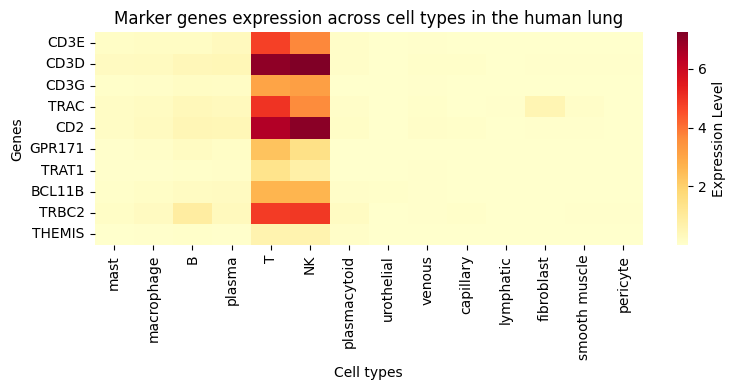

In [128]:
# Create a figure with a specific size (width=8, height=4)
plt.figure(figsize=(8,4))

sns.heatmap(
        human_blad_markers_expr, 
        # yellow-to-red color map
        cmap='YlOrRd', 
        # add label to calour bar
        cbar_kws={'label': 'Expression Level'}
)

# Customize labels
plt.title('Marker genes expression across cell types in the human lung')
plt.xlabel('Cell types')
plt.ylabel('Genes')

# Keep gene names horizontal
plt.yticks(rotation=0)

# Prevent label cutoff
plt.tight_layout()

plt.show()

From the color gradient, it is easier to compare the expression levels across different cell types. By looking at the heatmap, it shows the expression of T cell marker genes across different cell types in the lung. T cells and NK cells exhibit significantly high gene expression, while other cell types show lower expression levels.

To reduce data skewness and minimize the impact of extreme values, you can try using logged data to improve the visualisation. To do this, try the following code, then replace human_blad_markers_expr with human_blad_markers_expr_log and rerun the above code:

In [132]:
# Replace zero or negative values with a small constant (1e-6)
human_blad_markers_expr = human_blad_markers_expr.replace(0, 1e-6)

# Apply the natural logarithm to all numeric values in the DataFrame
human_blad_markers_expr_log = human_blad_markers_expr.map(np.log)

human_blad_markers_expr_log

,mast,macrophage,B,plasma,T,NK,plasmacytoid,urothelial,venous,capillary,lymphatic,fibroblast,smooth muscle,pericyte
CD3E,-2.074716,-1.640553,-1.654058,-1.202462,1.561189,1.307169,-2.291170,-4.221025,-2.954499,-3.937961,-4.854867,-3.915091,-3.575014,-3.687168
CD3D,-1.449750,-1.322767,-0.893087,-0.850351,1.946088,1.980384,-2.291170,-4.089238,-2.598014,-2.762156,-4.842852,-3.218469,-3.021955,-3.520026
CD3G,-2.604013,-2.216604,-1.646624,-1.843533,1.125963,1.159414,-13.815511,-5.041184,-3.111059,-3.893134,-4.842852,-4.088712,-3.947207,-4.406802
TRAC,-1.914233,-1.608842,-0.968806,-1.129613,1.609201,1.294047,-2.186682,-4.240295,-2.470234,-3.814376,-3.297337,-0.655176,-2.376552,-3.760103
CD2,-1.777240,-1.276694,-0.743342,-0.856266,1.872113,1.958572,-2.104919,-4.144621,-2.382522,-2.740870,-4.842852,-3.380875,-3.006483,-3.763802
GPR171,-3.011002,-2.384173,-1.543054,-2.128621,0.844647,0.380281,-13.815511,-5.118336,-4.066825,-4.994984,-13.815511,-4.273304,-4.312622,-4.299191
TRAT1,-3.355837,-2.985618,-2.478121,-2.456516,0.294320,-0.257086,-13.815511,-5.443661,-3.460648,-3.893134,-13.815511,-4.987475,-4.941288,-5.162005
BCL11B,-2.773445,-2.115702,-1.611276,-1.464142,0.970689,0.968248,-2.291170,-2.698948,-3.220546,-13.815511,-5.929593,-3.623726,-4.136395,-4.309409
TRBC2,-1.973717,-1.480481,-0.122490,-1.153727,1.580575,1.592861,-1.598023,-3.963164,-3.158144,-2.587714,-4.155694,-3.699966,-3.455796,-3.419159
THEMIS,-5.564374,-3.518078,-2.611277,-3.270414,-0.495670,-0.498514,-2.291170,-6.462500,-13.815511,-13.815511,-13.815511,-5.882212,-5.205352,-13.815511


## **Querying expression data for marker genes across multiple organs**

It is also possible to explore marker genes across multiple organs within the same species and cell type.

The following example demonstrates how to obtain marker genes for several target organs and calculate their average gene expression.

In [133]:
# organ_list = T_location
organ_list = ['bladder', 'blood', 'colon']
# create a dictionary to store each avg_gene_expr
avg_gene_expr_dic = {}

for organ in organ_list:
    markers_in_human_T = api.markers(
        organism='h_sapiens', 
        organ=organ, 
        cell_type='T', 
        number=10
    )

    human_markers_expr = api.average(
        organism='h_sapiens',
        organ=organ,
        features=markers_in_human_T
    )

    avg_gene_expr_dic[organ] = human_markers_expr
    # print a title for each pandas dataframe
    print(f'Marker genes expression in {organ}:')
    display(human_markers_expr)



Marker genes expression in bladder:


,mast,macrophage,B,plasma,T,NK,plasmacytoid,urothelial,venous,capillary,lymphatic,fibroblast,smooth muscle,pericyte
IL7R,0.664889,2.182518,2.033654,1.312376,28.135704,9.253947,0.455166,0.076542,0.176367,0.078276,0.028784,0.106779,0.142393,0.144459
KLRB1,0.133462,0.221172,0.219827,0.284843,6.223657,1.770163,0.151722,0.015415,0.118211,0.015234,0.000000,0.029526,0.038319,0.016711
CD3D,0.234629,0.266397,0.409390,0.427265,7.001246,7.245528,0.101148,0.016752,0.074421,0.063155,0.007885,0.040016,0.048706,0.029599
TRAC,0.147455,0.200119,0.379536,0.323158,4.998813,3.647517,0.112289,0.014403,0.084565,0.022051,0.036982,0.519351,0.092870,0.023281
SCML4,0.016605,0.036199,0.280037,0.045873,0.883203,0.399052,0.000000,0.003677,0.005038,0.006772,0.005131,0.004861,0.002264,0.000489
CD3E,0.125592,0.193873,0.191272,0.300453,4.764482,3.695696,0.101148,0.014684,0.052105,0.019488,0.007790,0.019939,0.028015,0.025043
TCF7,0.211658,0.091793,0.277251,0.091191,0.969489,0.559059,0.000000,0.092858,0.070932,0.066461,0.004539,0.115293,0.234580,0.087630
RCAN3,0.160652,0.155659,0.472888,0.149248,1.671599,0.760903,0.183283,0.254829,0.059359,0.075714,0.062031,0.026424,0.126609,0.136794
CD40LG,0.023607,0.023028,0.034449,0.032247,0.705604,0.224116,0.000000,0.001458,0.019296,0.020381,0.000000,0.003260,0.003752,0.002005
SPOCK2,0.071826,0.124031,0.380520,0.190747,2.532631,1.840931,0.088608,0.006583,0.139516,0.142078,0.027342,0.016724,0.022150,0.019802


Marker genes expression in blood:


,HSC,neutrophil,basophil,myeloid,monocyte,macrophage,dendritic,erythrocyte,B,plasma,T,NK,plasmacytoid,platelet
CD3G,0.020631,0.004321,0.011025,0.0,0.008900,0.023867,0.000000,0.005833,0.028580,0.053066,4.385546,0.503251,0.000000,0.006374
CD3E,0.124166,0.013077,0.011682,0.0,0.020533,0.031793,0.035253,0.024319,0.038457,0.064806,4.817160,0.902440,0.733853,0.030171
CD3D,0.006005,0.029803,0.010917,0.0,0.016890,0.004781,0.067483,0.016244,0.039675,0.070532,5.097938,0.388782,0.040345,0.017165
TRAC,0.030122,0.005518,0.010917,0.0,0.015166,0.006290,0.000000,0.009169,0.112989,0.123445,5.330725,0.259370,0.250437,0.012749
IL32,0.059640,0.055365,0.013679,0.0,0.072040,0.094219,0.041346,0.036509,0.063592,0.134535,11.104210,4.491172,0.000000,0.062721
IL7R,0.087230,0.017485,0.000000,0.0,0.035839,0.045781,0.041346,0.024048,0.290216,0.123598,12.922119,1.329986,1.359255,0.024309
TRAT1,0.057195,0.001523,0.000000,0.0,0.003872,0.013311,0.000000,0.002653,0.005057,0.011439,1.518885,0.039383,0.000000,0.000000
BCL11B,0.003953,0.005837,0.000000,0.0,0.008514,0.014496,0.000000,0.007048,0.024271,0.054388,2.808195,0.999413,0.000000,0.025220
TRABD2A,0.000000,0.001531,0.000000,0.0,0.009098,0.013877,0.000000,0.002225,0.120867,0.015527,0.765957,0.028744,0.000000,0.000000
CD5,0.000000,0.001071,0.000000,0.0,0.002491,0.006203,0.000000,0.001333,0.008800,0.008303,0.533116,0.016915,0.000000,0.000000


Marker genes expression in colon:


,neutrophil,mast,monocyte,B,plasma,T,goblet,brush,crypt,transit amp,enterocyte,paneth,venous,capillary,fibroblast,enteroendocrine
IL7R,0.823445,1.267235,0.145074,1.114490,0.266519,33.401619,0.142437,0.003558,0.050159,0.034201,0.078309,0.128426,1.194315,0.083895,0.080801,0.041079
CD3E,0.040382,0.211732,0.042434,0.170154,0.048645,4.864869,0.041608,0.000000,0.017454,0.014510,0.023691,0.029011,0.099526,0.000000,0.031710,0.000000
CD3D,0.224794,0.133106,0.061376,0.210484,0.047069,5.070080,0.037477,0.000000,0.027820,0.012363,0.023916,0.059247,0.199053,0.000000,0.043336,0.000000
KLRB1,0.154444,0.000000,0.048358,0.234619,0.081353,7.393442,0.016229,0.043012,0.014015,0.006518,0.016729,0.028680,0.000000,0.083895,0.029697,0.000000
CD2,0.112301,0.070627,0.046721,0.125355,0.034200,4.843677,0.029021,0.000000,0.006043,0.005618,0.017474,0.029240,0.394478,0.093465,0.008256,0.017268
CD7,0.157870,0.310273,0.033392,0.135560,0.076977,4.733951,0.033752,0.059581,0.024423,0.002875,0.029731,0.036368,0.199053,0.205356,0.046665,0.017943
CCL5,0.028958,0.214139,0.144021,0.466883,0.346492,8.962721,0.088841,0.022995,0.043583,0.014140,0.061775,0.087824,0.119577,0.000000,0.078462,0.098193
LINC01871,0.079763,0.062478,0.037955,0.093925,0.039460,3.500733,0.020598,0.000000,0.007287,0.030309,0.016496,0.031610,0.000000,0.105955,0.033724,0.023500
TRBC1,0.040206,0.133106,0.033480,0.193458,0.035507,3.749583,0.031217,0.011498,0.022873,0.019478,0.020044,0.044010,0.049763,0.159765,0.046046,0.000000
CD3G,0.011424,0.062478,0.001872,0.074176,0.018876,1.911019,0.012220,0.000000,0.003344,0.000000,0.007290,0.006688,0.000000,0.000000,0.009898,0.000000


If you are interested in identifying these genes, the following example returns multiple lists of marker genes, with each list corresponding to a queried organ.

In [68]:
# organs = T_location
organs = ['bladder', 'blood', 'colon']

for organ in organs:
    markers_in_human_T = api.markers(
        organism='h_sapiens', 
        organ=organ, 
        cell_type='T', 
        number=10
    )
    
    print(f'Marker genes in {organ}:')
    display(markers_in_human_T)

Marker genes in bladder:


['IL7R',
 'KLRB1',
 'CD3D',
 'TRAC',
 'SCML4',
 'CD3E',
 'TCF7',
 'RCAN3',
 'CD40LG',
 'SPOCK2']

Marker genes in blood:


['CD3G',
 'CD3E',
 'CD3D',
 'TRAC',
 'IL32',
 'IL7R',
 'TRAT1',
 'BCL11B',
 'TRABD2A',
 'CD5']

Marker genes in colon:


['IL7R',
 'CD3E',
 'CD3D',
 'KLRB1',
 'CD2',
 'CD7',
 'CCL5',
 'LINC01871',
 'TRBC1',
 'CD3G']

#### Output
This method returns multiple lists of marker genes, one for each queried organ.

## **Exploring the collaborative contributions of different cell types**

As the heat map shown above, T cell and NK cell both show high expression level in human lung across all the marker genes of T cells. Some genes can exhibit the same expression patterns across different cell types. These genes may be related to complementary or interdependent functions between cell types. To take a closer look at cell type co-existence, use the following code to generate a table showing the locations of all cell types:

In [13]:
# convert T_cell_location list to a string
T_cell_location_str = ",".join(T_cell_location)

T_table = api.celltypexorgan(
        organism='h_sapiens', 
        organs=T_cell_location_str,
        measurement_type='gene_expression', 
        boolean=True)

T_table

organs,bladder,blood,colon,eye,fat,gut,kidney,liver,lung,lymphnode,...,muscle,pancreas,prostate,salivary,skin,spleen,thymus,tongue,trachea,uterus
cell types,,,,,,,,,,,,,,,,,,,,,
T,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
B,True,True,True,True,True,True,True,False,True,True,...,False,True,False,True,True,True,True,True,True,True
macrophage,True,True,False,True,True,False,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
fibroblast,True,False,True,True,True,True,False,True,True,True,...,True,True,True,True,True,False,True,True,True,True
plasma,True,True,True,True,True,True,False,True,True,True,...,False,True,False,True,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
horizontal,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
keratinocyte,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
keratocyte,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Output
This method returns a *pandas.DataFrame* where:
- Each row represents a cell type (alphabetically).
- Each column corresponds to an organ (alphabetically).
- The values indicate the presence/absence (with parameter boolean=True) or number of sampled cells/nuclei (with parameter boolean=False)

Also, you can use the following code to query three cell types similar to T cell in the human lung based on the selected features:

In [78]:
# this method is broken
# waiting for api correction
similar = api.similar_celltypes(
        organism='h_sapiens', 
        organ='lung', 
        celltype='T', 
        number=3, 
        method='correlation', 
        measurement_type='gene_expression',
        features=['CD3E', 'CD3D', 'CD3G', 'TRAC', 'CD2']
        )

TypeError: API.similar_celltypes() got an unexpected keyword argument 'features'

## **Conclusion** 

This tutorial demonstrates several methods for querying and analysing gene expression data based on target cell type.

Thank you for using the *atlasapprox* API. For more detailed information, please refer to the [official documentation](https://atlasapprox.readthedocs.io/en/latest/python/index.html).

In [3]:
features = api.features(organism='h_sapiens', 
             measurement_type='gene_expression')

features

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       'A2ML1-AS2', 'A2MP1', 'A3GALT2',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11AP1', 'ZYG11B', 'ZYX', 'ZYXP1',
       'ZZEF1', 'hsa-mir-1253'],
      dtype='object', name='features', length=58870)